# Aggregating data by category

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
nasdaq = pd.read_excel('data/listings.xlsx', sheetname='nasdaq',na_values=['n/a'])

C:\Users\Shubham\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [5]:
nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 7 columns):
Stock Symbol             3167 non-null object
Company Name             3167 non-null object
Last Sale                3165 non-null float64
Market Capitalization    3167 non-null float64
IPO Year                 1386 non-null float64
Sector                   2767 non-null object
Industry                 2767 non-null object
dtypes: float64(3), object(4)
memory usage: 173.3+ KB


## group the data by sector


In [6]:
# transform the market capitalization by million dollar units
nasdaq['market_cap_m'] = nasdaq['Market Capitalization'].div(1e6)

# now we dont need market capitalization column, we can eliminate it with the drop column
nasdaq = nasdaq.drop('Market Capitalization', axis=1) 

nasdaq_by_sector = nasdaq.groupby('Sector') # create groupby object

# we can then iterate over this new object in a loop, in each iteration 
# the object returns two items just like a dictionary first a key that corresponds to a category represented by this group of data
# second a dataframe containing information for this group
for sector, data in nasdaq_by_sector:
    print(sector, data.market_cap_m.mean())


Basic Industries 724.8999338580088
Capital Goods 1511.2373727809975
Consumer Durables 839.8026066270018
Consumer Non-Durables 3104.0512055241334
Consumer Services 5582.344174819412
Energy 826.607607854727
Finance 1044.0902047996321
Health Care 1758.709196756265
Miscellaneous 3445.655934557965
Public Utilities 2357.8653150733353
Technology 10883.43421354678
Transportation 2869.660006726413


### pandas makes it easier to aggregate by category
- instead of a for loop, select any numerical column from grouped data and apply aggregate statistics

In [7]:
mcap_by_sector = nasdaq_by_sector.market_cap_m.mean()

### Visualize the category summary as horizontal bar chart


Text(0.5, 0, 'USD mn')

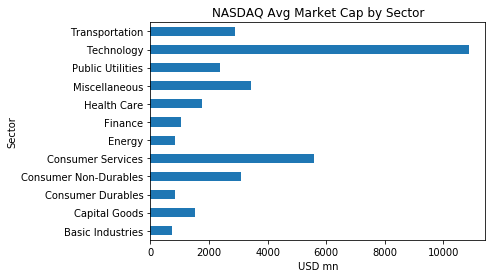

In [8]:
title = 'NASDAQ Avg Market Cap by Sector'
mcap_by_sector.plot(kind='barh', title=title)
plt.xlabel('USD mn')


### Aggregate summary for all numeric columns by applying statistics to group data instead of selecting one or more columns

In [9]:
nasdaq_by_sector.mean()

,Last Sale,IPO Year,market_cap_m
Sector,,,
Basic Industries,21.597679,2000.766667,724.899934
Capital Goods,26.188681,2001.324675,1511.237373
Consumer Durables,24.363391,2003.222222,839.802607
Consumer Non-Durables,25.749565,2000.609756,3104.051206
Consumer Services,34.917318,2004.104575,5582.344175
Energy,15.496834,2008.034483,826.607608
Finance,29.644242,2010.321101,1044.090205
Health Care,19.462531,2009.240409,1758.709197
Miscellaneous,46.094369,2004.333333,3445.655935


### Median market capitalization by sector
- market capitalization data has large outliers. To get a more robust summary of the market value of companies in each sector, calculate the median market capitalization by sector.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
Stock Symbol             3147 non-null object
Company Name             3147 non-null object
Last Sale                3079 non-null float64
Market Capitalization    3147 non-null float64
IPO Year                 1361 non-null float64
Sector                   2177 non-null object
Industry                 2177 non-null object
dtypes: float64(3), object(4)
memory usage: 172.2+ KB


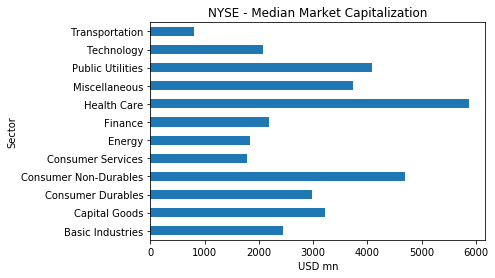

In [11]:
# Inspect NYSE data
nyse = pd.read_excel('data/listings.xlsx', sheet_name='nyse', na_values='n/a')

nyse.info()

# Create market_cap_m
nyse['market_cap_m'] = nyse['Market Capitalization'].div(1e6)

# Drop market cap column
nyse = nyse.drop('Market Capitalization', axis=1)

# Group nyse by sector
mcap_by_sector = nyse.groupby('Sector')

# Calculate median
median_mcap_by_sector = mcap_by_sector.market_cap_m.median()

# Plot and show as horizontal bar chart
median_mcap_by_sector.plot(kind='barh', title='NYSE - Median Market Capitalization')

# Add the label
plt.xlabel('USD mn')

# Show the plot
plt.show()

### Median market capitalization by IPO year
- analyze how market capitalization has evolved for different IPO years. combine data from all three exchanges to get a more comprehensive view.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6674 entries, 0 to 3166
Data columns (total 8 columns):
Stock Symbol             6674 non-null object
Company Name             6674 non-null object
Last Sale                6590 non-null float64
Market Capitalization    6674 non-null float64
IPO Year                 2852 non-null float64
Sector                   5182 non-null object
Industry                 5182 non-null object
Exchange                 6674 non-null object
dtypes: float64(3), object(5)
memory usage: 469.3+ KB
     Stock Symbol                                       Company Name  \
0            XXII                            22nd Century Group, Inc   
1             FAX              Aberdeen Asia-Pacific Income Fund Inc   
2             IAF                 Aberdeen Australia Equity Fund Inc   
3              CH                          Aberdeen Chile Fund, Inc.   
4  ABE             Aberdeen Emerging Markets Smaller Company Oppo...   

   Last Sale  Market Capitalization 

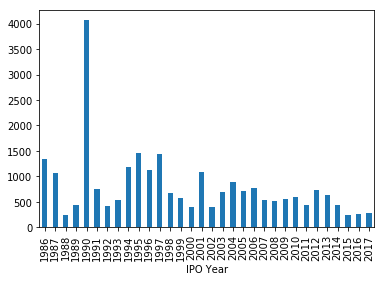

In [13]:
# Inspect listings
amex = pd.read_excel('data/listings.xlsx', sheet_name='amex', na_values='n/a')
nyse = pd.read_excel('data/listings.xlsx', sheet_name='nyse', na_values='n/a')
nasdaq = pd.read_excel('data/listings.xlsx', sheet_name='nasdaq', na_values='n/a')

amex['Exchange'] = 'amex'
nyse['Exchange'] = 'nyse'
nasdaq['Exchange'] = 'nasdaq'
                     
listings = pd.concat([amex, nyse, nasdaq])
listings.info()

# Show listings head
print(listings.head())

# Create market_cap_m
listings['market_cap_m'] = listings['Market Capitalization'].div(1e6)

# Select companies with IPO after 1985
listings = listings[listings['IPO Year'] > 1985]

# Drop missing values and convert to integers
listings['IPO Year'] = listings['IPO Year'].dropna().astype(int)

# Calculate the median market cap by IPO Year and sort the index
ipo_by_year = listings.groupby('IPO Year').market_cap_m.median().sort_index()

# Plot results as a bar chart
ipo_by_year.plot(kind='bar')

# Show the plot
plt.show()

#### After 1985, the year 1990 had the highest median market capitalization.

### All summary statistics by sector
- apply the various summary statistics to a groupby object to obtain the result on a per-category basis. This includes the .describe() function, which provides several insights all at once!


In [14]:
# Inspect NASDAQ data
nasdaq.info()

# Create market_cap_m
nasdaq['market_cap_m'] = nasdaq['Market Capitalization'].div(1e6)

# Drop the Market Capitalization column
nasdaq.drop('Market Capitalization', axis=1, inplace=True)

# Group nasdaq by Sector
nasdaq_by_sector = nasdaq.groupby('Sector')

# Create summary statistics by sector
summary = nasdaq_by_sector.describe()

# Print the summary
print(summary)

# Unstack 
summary = summary.unstack()

# Print the summary again
print(summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 8 columns):
Stock Symbol             3167 non-null object
Company Name             3167 non-null object
Last Sale                3165 non-null float64
Market Capitalization    3167 non-null float64
IPO Year                 1386 non-null float64
Sector                   2767 non-null object
Industry                 2767 non-null object
Exchange                 3167 non-null object
dtypes: float64(3), object(5)
memory usage: 198.0+ KB
                      Last Sale                                          \
                          count       mean         std     min      25%   
Sector                                                                    
Basic Industries           78.0  21.597679   29.009745  0.0336   2.6325   
Capital Goods             172.0  26.188681   36.596723  0.1500   4.3800   
Consumer Durables          88.0  24.363391   44.399150  0.0498   3.7500   
Consumer Non-Durabl